In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!pwd
os.chdir('gdrive/My Drive/Colab Notebooks/')
!pwd
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content
/content/gdrive/My Drive/Colab Notebooks
 abcnews-date-text.csv
 ab_data.csv
'A B Test.ipynb'
 AirPassengers.csv
'A method to categorical variable in flight delay datasets.ipynb'
'ARIMA Forecasting.ipynb'
 assignment0.ipynb
'assignment2_(release).ipynb'
 assignment2_sol.ipynb
'Building a Simple Chatbot.ipynb'
 chatbot.txt
'Classifying Tweets for Sentiment Analysis.ipynb'
'Concrete Compressive Strength Prediction.ipynb'
'Copy of Lecture_6_in_class.ipy

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
credits_df = pd.read_csv('./tmdb_5000_credits.csv')
movies_df = pd.read_csv('./tmdb_5000_movies.csv')
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
# merging the two files
movies_df = pd.merge(movies_df, credits_df, left_on ='id', right_on='movie_id', how='left', suffixes=('', '_y'))

movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew'],
      dtype='object')

# Data Cleansing

In [6]:
# First step is to clean the data and see which are the redundant or unnecessary cols

del_col_list = ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 
                'overview', 'production_companies', 'original_title', 'title_y']

movies_df = movies_df.drop(del_col_list, axis=1)
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Let's parse JSON

In [7]:
# we see that there are columns which are in json format,
# let's flatten these json data into easyily interpretable lists

def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,19995,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,206647,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,49026,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,49529,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
#  dropping the duplicates from the dataset.
print(movies_df.shape)
movies_df = movies_df.drop_duplicates(keep='first')
print(movies_df.shape)

(4803, 15)
(4803, 15)


In [9]:
# replacing all the zeros from revenue and budget cols.

cols = ['budget', 'revenue']
movies_df[cols] = movies_df[cols].replace(0, np.nan)

# dropping all the rows with na in the columns mentioned above in the list.
movies_df.dropna(subset=cols, inplace=True)
movies_df.shape

(3229, 15)

In [10]:
# Changing the release_date column to DateTime column

movies_df.release_date = pd.to_datetime(movies_df['release_date'])
# To answer the last question, we'll have to extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,release_year
0,237000000.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2.787965e+09,162.0,"['English', 'Español']",Avatar,7.2,11800,19995,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009
1,300000000.0,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,9.610000e+08,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007
2,245000000.0,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,8.806746e+08,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,206647,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015
3,250000000.0,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1.084939e+09,165.0,['English'],The Dark Knight Rises,7.6,9106,49026,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012
4,260000000.0,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,2.841391e+08,132.0,['English'],John Carter,6.1,2124,49529,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012


In [11]:
# Changing the data type of the below mentioned columns and 
change_cols=['budget', 'revenue']
#changing data type
movies_df[change_cols]=movies_df[change_cols].applymap(np.int64)
movies_df.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
movie_id                         int64
cast                            object
crew                            object
release_year                     int64
dtype: object

# Identifying relationships between variables / features

In [12]:
# To find out the most expensive movies, we need to look at the budget set for them which is an indicator of expense.

expensive_movies_df = movies_df.sort_values(by ='budget', ascending=False).head()
expensive_movies_df

# below are the 5 most expensive movies in descending order.

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,1865,"['Johnny Depp', 'Penélope Cruz', 'Ian McShane'...","[{""credit_id"": ""566b4f54c3a3683f56005151"", ""de...",2011
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,99861,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...",2015
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,1452,"['Brandon Routh', 'Kevin Spacey', 'Kate Boswor...","[{""credit_id"": ""553bef6a9251416874003c8f"", ""de...",2006
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,49529,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012


In [13]:
def find_min_max_in(col):
    """
    The function takes in a column and returns the top 5
    and bottom 5 movies dataframe in that column.
    
    args:
        col: string - column name
    return:
        info_df: dataframe - final 5 movies dataframe
    """
    
    top = movies_df[col].idxmax()
    top_df = pd.DataFrame(movies_df.loc[top])
    
    bottom = movies_df[col].idxmin()
    bottom_df = pd.DataFrame(movies_df.loc[bottom])
    
    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

find_min_max_in('budget')

,17,4238
budget,380000000,1
genres,"['Adventure', 'Action', 'Fantasy']","['Drama', 'Comedy']"
id,1865,3082
popularity,135.414,28.2765
production_countries,['United States of America'],['United States of America']
release_date,2011-05-14 00:00:00,1936-02-05 00:00:00
revenue,1045713802,8500000
runtime,136,87
spoken_languages,"['English', 'Español']",['English']
title,Pirates of the Caribbean: On Stranger Tides,Modern Times


In [14]:
# to find the most profitable movies, we need to find who made the most 
# amount after deducting the budget from the revenue generated.

movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
cols = ['budget',
         'profit',
         'revenue',
         'genres',
         'id',
         'popularity',
         'production_countries',
        'release_date',
        'release_year',
         'runtime',
         'spoken_languages',
         'title',
        'cast',
         'vote_average',
         'vote_count']
movies_df = movies_df[cols]
movies_df.sort_values(by = ['budget'], ascending=False).head()

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,vote_average,vote_count
17,380000000,665713802,1045713802,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,2011,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,"['Johnny Depp', 'Penélope Cruz', 'Ian McShane'...",6.4,4948
1,300000000,661000000,961000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,2007,169.0,['English'],Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,4500
7,280000000,1125403694,1405403694,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,2015,141.0,['English'],Avengers: Age of Ultron,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",7.3,6767
10,270000000,121081192,391081192,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,2006,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,"['Brandon Routh', 'Kevin Spacey', 'Kate Boswor...",5.4,1400
4,260000000,24139100,284139100,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,2012,132.0,['English'],John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",6.1,2124


In [15]:
# Comparison between min and max profits
find_min_max_in('profit')

,0,13
budget,237000000,255000000
profit,2550965087,-165710090
revenue,2787965087,89289910
genres,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Action', 'Adventure', 'Western']"
id,19995,57201
popularity,150.438,49.047
production_countries,"['United States of America', 'United Kingdom']",['United States of America']
release_date,2009-12-10 00:00:00,2013-07-03 00:00:00
release_year,2009,2013
runtime,162,149


In [16]:
# to find the most talked about movies, we can sort the dataframe on the popularity column
popular_movies_df = movies_df.sort_values(by ='budget', ascending=False).head()
popular_movies_df.head()

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,vote_average,vote_count
17,380000000,665713802,1045713802,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,2011,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,"['Johnny Depp', 'Penélope Cruz', 'Ian McShane'...",6.4,4948
1,300000000,661000000,961000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,2007,169.0,['English'],Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,4500
7,280000000,1125403694,1405403694,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,2015,141.0,['English'],Avengers: Age of Ultron,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",7.3,6767
10,270000000,121081192,391081192,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,2006,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,"['Brandon Routh', 'Kevin Spacey', 'Kate Boswor...",5.4,1400
4,260000000,24139100,284139100,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,2012,132.0,['English'],John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",6.1,2124


In [17]:
# in terms of popularity score
find_min_max_in('popularity')

,546,3921
budget,74000000,3000000
profit,1082730962,3804016
revenue,1156730962,6804016
genres,"['Family', 'Animation', 'Adventure', 'Comedy']",['Drama']
id,211672,44634
popularity,875.581,0.019984
production_countries,['United States of America'],['United States of America']
release_date,2015-06-17 00:00:00,2004-09-30 00:00:00
release_year,2015,2004
runtime,91,94


In [18]:
# in terms of runtime
find_min_max_in('runtime')

,2384,3626
budget,18000000,5000000
profit,-17128721,-925977
revenue,871279,4074023
genres,"['Crime', 'Drama', 'Thriller', 'History']",['Documentary']
id,43434,78394
popularity,1.13838,4.49837
production_countries,"['France', 'Germany']","['France', 'United Kingdom']"
release_date,2010-05-19 00:00:00,2010-05-14 00:00:00
release_year,2010,2010
runtime,338,41


In [19]:
# Average runtime of movies
 
movies_df['runtime'].mean()

110.72437287085785

In [20]:
# movies rated above 7 

movies_df[movies_df['vote_average'] >= 7.0]

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,vote_average,vote_count
0,237000000,2550965087,2787965087,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009,162.0,"['English', 'Español']",Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,11800
3,250000000,834939099,1084939099,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,2012,165.0,['English'],The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",7.6,9106
6,260000000,331794936,591794936,"['Animation', 'Family']",38757,48.681969,['United States of America'],2010-11-24,2010,100.0,['English'],Tangled,"['Zachary Levi', 'Mandy Moore', 'Donna Murphy'...",7.4,3330
7,280000000,1125403694,1405403694,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,2015,141.0,['English'],Avengers: Age of Ultron,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",7.3,6767
8,250000000,683959197,933959197,"['Adventure', 'Fantasy', 'Family']",767,98.885637,"['United Kingdom', 'United States of America']",2009-07-07,2009,153.0,['English'],Harry Potter and the Half-Blood Prince,"['Daniel Radcliffe', 'Rupert Grint', 'Emma Wat...",7.4,5293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,160000,6546368,6706368,"['Documentary', 'History']",1779,3.284903,['United States of America'],1989-09-01,1989,91.0,['English'],Roger & Me,"['Michael Moore', 'Roger B. Smith', 'Rhonda Br...",7.4,90
4724,10000,6990000,7000000,"['Drama', 'Fantasy', 'Horror', 'Science Fiction']",985,20.399578,['United States of America'],1977-03-19,1977,89.0,['English'],Eraserhead,"['Jack Nance', 'Charlotte Stewart', 'Allen Jos...",7.5,485
4738,60000,3161152,3221152,"['Mystery', 'Drama', 'Thriller']",473,27.788067,['United States of America'],1998-07-10,1998,84.0,['English'],Pi,"['Sean Gullette', 'Mark Margolis', 'Ben Shenkm...",7.1,586
4773,27000,3124130,3151130,['Comedy'],2292,19.748658,['United States of America'],1994-09-13,1994,92.0,['English'],Clerks,"[""Brian O'Halloran"", 'Jeff Anderson', 'Jason M...",7.4,755


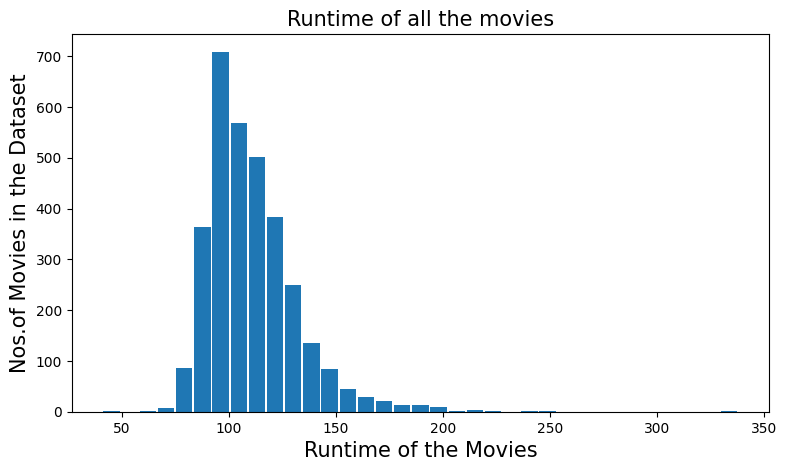

In [21]:
# Year we had the most number of profitable movies.
# we'll first have to define a profitable movies

#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(movies_df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

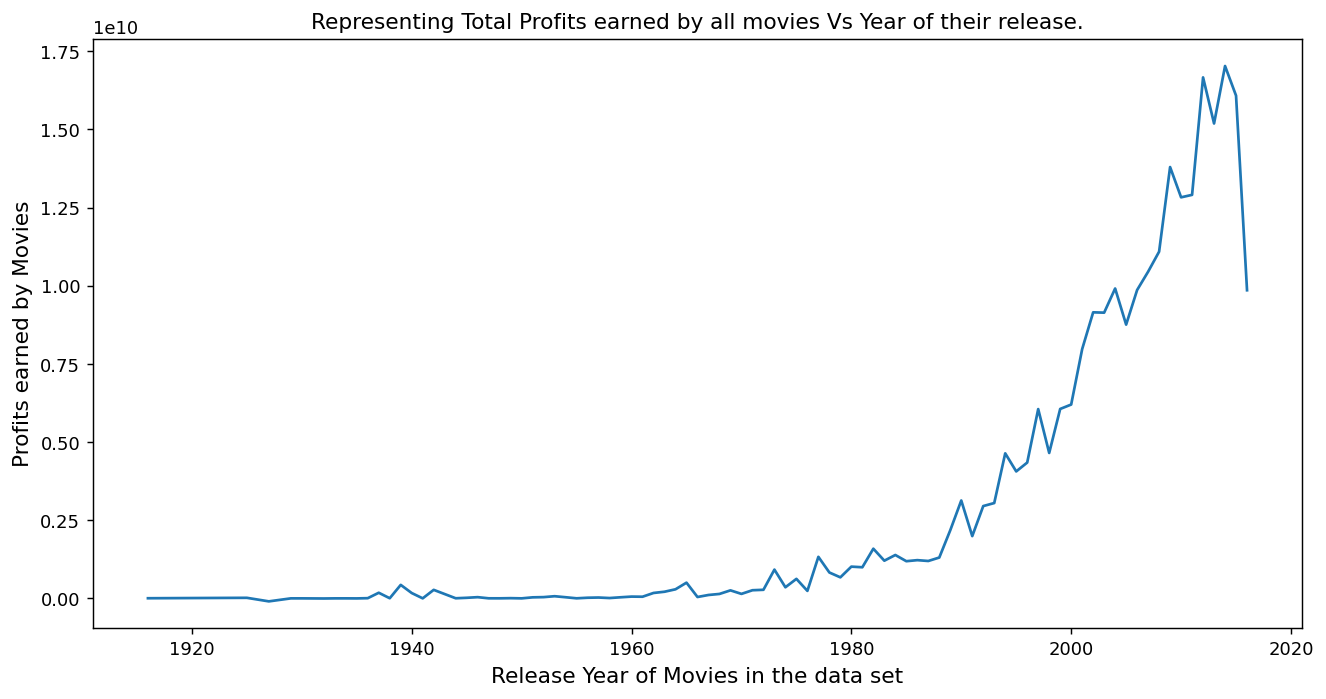

In [22]:
profits_year = movies_df.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [23]:
# Most profitable year from the given dataset.

profits_year.idxmax()

2014

In [24]:
#selecting the movies having profit $50M or more
profit_data = movies_df[movies_df['profit'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,vote_average,vote_count
1,237000000,2550965087,2787965087,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009,162.0,"['English', 'Español']",Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,11800
2,300000000,661000000,961000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,2007,169.0,['English'],Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,4500
3,245000000,635674609,880674609,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,2015,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",6.3,4466


In [25]:
# formatting the data in the genres columns.
profit_data['genres']=profit_data['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')

profit_data['genres']=profit_data['genres'].str.split(',')

profit_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,vote_average,vote_count
1,237000000,2550965087,2787965087,"[Action, Adventure, Fantasy, ScienceFiction]",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009,162.0,"['English', 'Español']",Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,11800
2,300000000,661000000,961000000,"[Adventure, Fantasy, Action]",285,139.082615,['United States of America'],2007-05-19,2007,169.0,['English'],Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,4500
3,245000000,635674609,880674609,"[Action, Adventure, Crime]",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,2015,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",6.3,4466
4,250000000,834939099,1084939099,"[Action, Crime, Drama, Thriller]",49026,112.312950,['United States of America'],2012-07-16,2012,165.0,['English'],The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",7.6,9106
5,258000000,632871626,890871626,"[Fantasy, Action, Adventure]",559,115.699814,['United States of America'],2007-05-01,2007,139.0,"['English', 'Français']",Spider-Man 3,"['Tobey Maguire', 'Kirsten Dunst', 'James Fran...",5.9,3576


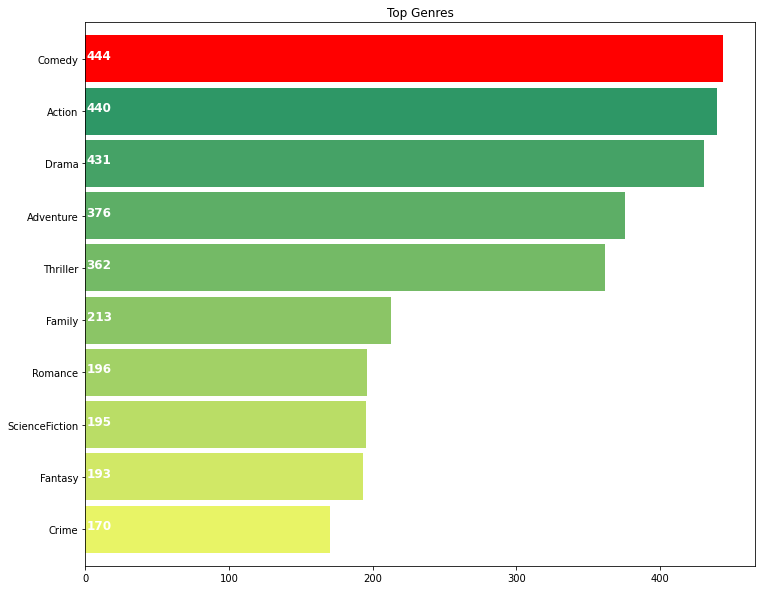

In [26]:
plt.subplots(figsize=(12,10))
list1=[]

# extending the list to 
for i in profit_data['genres']:
    list1.extend(i)
    
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(
    width=0.9,
    color=sns.color_palette('summer_r',10))

for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Genres')
plt.show()

Let's try to find out the most frequent cast in the movies based on which we can tell about the success factor of the cast.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


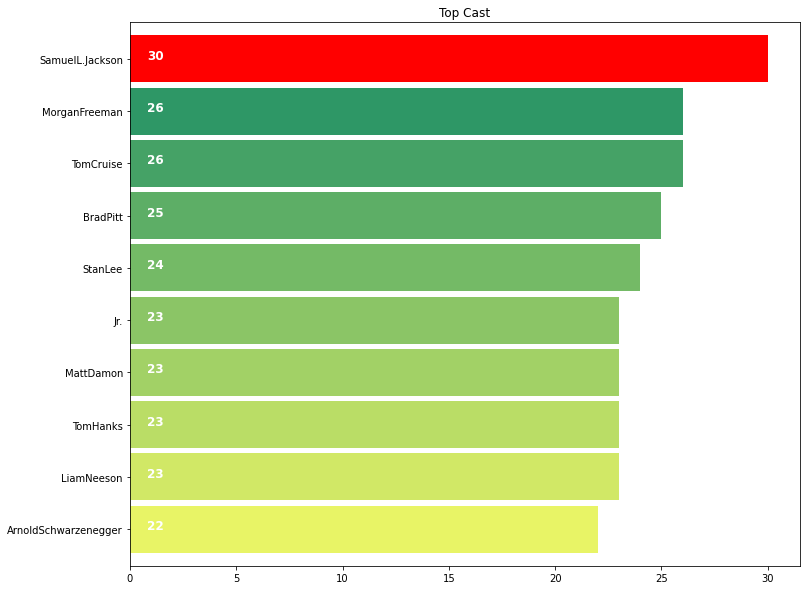

In [27]:
profit_data['cast']=profit_data['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
profit_data['cast']=profit_data['cast'].str.split(',')

plt.subplots(figsize=(12,10))
list1=[]
for i in profit_data['cast']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer_r',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Cast')
plt.show()

In [28]:
profit_data['profit'].mean()
profit_data['revenue'].mean()

262022090.17768925

In [29]:
profit_data['runtime'].mean()

114.37928286852589

In [30]:
profit_data['budget'].mean()

63032056.92111554

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.p

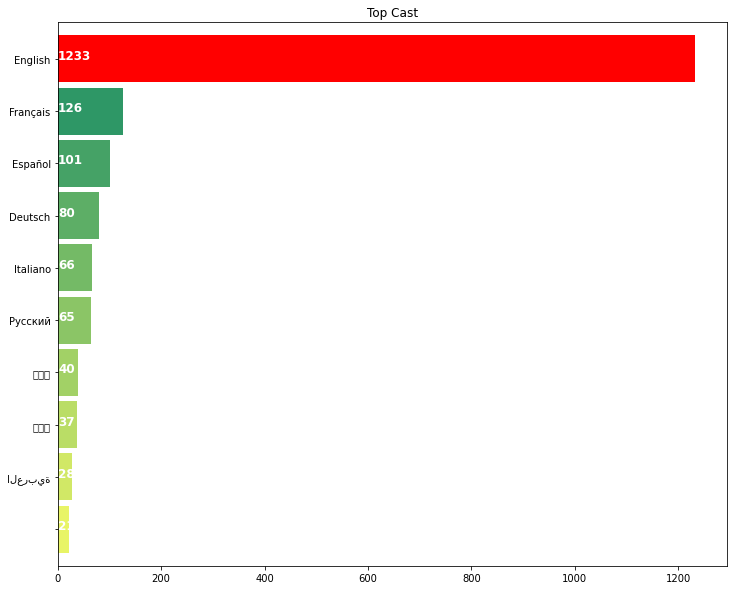

In [31]:
profit_data['spoken_languages']=profit_data['spoken_languages'].str.strip('[]').str.replace(' ','').str.replace("'",'')
profit_data['spoken_languages']=profit_data['spoken_languages'].str.split(',')

plt.subplots(figsize=(12,10))
list1=[]
for i in profit_data['spoken_languages']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer_r',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Cast')
plt.show()